# 📘 AI in Cache Replacement with Groq API

This Colab notebook demonstrates how to evaluate **AI-driven cache replacement policies** using the **Groq API** and multiple LLM models. The workflow includes:

- Setting up dependencies (system + Python + Groq API client)  
- Running experiments with various LLMs on cache replacement policies  
- Collecting and zipping generated policy files  
- Visualizing results with **matplotlib** and **seaborn**  
- Comparing **new AI-generated policies** vs **classical baselines (LRU, SHiP++, Hawkeye, etc.)**



## 🔧 1. Environment Setup

We begin by cloning/uploading the project and installing dependencies.


In [ ]:
# Clone your repo (you can upload zip or point to GitHub/Drive)
!gdown "https://drive.google.com/uc?id=1ZHegHgPheGuHXeqe8OEDsdkAWV1zZsAA" -O cacheforge.zip
!unzip cacheforge.zip -d cacheforge
%cd cacheforge

# Install system deps
!apt-get update && apt-get install -y build-essential sqlite3

# Install Python deps
!pip install -r environment.yml  # Or convert environment.yml
!pip install groq  # Groq API client


Downloading...
From (original): https://drive.google.com/uc?id=1ZHegHgPheGuHXeqe8OEDsdkAWV1zZsAA
From (redirected): https://drive.google.com/uc?id=1ZHegHgPheGuHXeqe8OEDsdkAWV1zZsAA&confirm=t&uuid=9013d617-79b3-435b-85ee-81a91129217d
To: /content/cacheforge.zip
100% 2.95G/2.95G [00:38<00:00, 77.1MB/s]
Archive:  cacheforge.zip
   creating: cacheforge/cacheforge/
 extracting: cacheforge/cacheforge/.gitignore  
  inflating: cacheforge/cacheforge/LICENSE  
  inflating: cacheforge/cacheforge/PromptGenerator.py  
  inflating: cacheforge/cacheforge/RAG.py  
 extracting: cacheforge/cacheforge/README.md  
  inflating: cacheforge/cacheforge/run_champsim.py  
  inflating: cacheforge/cacheforge/run_champsim.sh  
   creating: cacheforge/cacheforge/__pycache__/
  inflating: cacheforge/cacheforge/__pycache__/RAG.cpython-312.pyc  
  inflating: cacheforge/cacheforge/__pycache__/PromptGenerator.cpython-312.pyc  
  inflating: cacheforge/cacheforge/__pycache__/RAG.cpython-39.pyc  
  inflating: cacheforge/c

In [ ]:
!pip install conda-pack
!conda env create -f environment.yml -n cacheforge_env


/bin/bash: line 1: conda: command not found


In [ ]:
%cd cacheforge


/content/cacheforge/cacheforge


In [ ]:
!pip install accelerate==0.24.1 aiohttp==3.11.16 aiosignal==1.3.2 \
    annotated-types==0.7.0 anyio==4.9.0 attrs==25.3.0 certifi==2025.1.31 \
    charset-normalizer==3.4.1 cramjam==2.9.1 datasets==2.16.1 dill==0.3.7 \
    distro==1.9.0 docstring-parser==0.16 dotenv==0.9.9 fastparquet==2024.11.0 \
    filelock==3.18.0 frozenlist==1.5.0 fsspec==2023.10.0 h11==0.16.0 \
    httpcore==1.0.9 httpx==0.28.1 huggingface-hub==0.30.1 idna==3.10 \
    jinja2==3.1.6 jiter==0.9.0 markdown-it-py==3.0.0 markupsafe==3.0.2 \
    mdurl==0.1.2 mpmath==1.3.0 multidict==6.3.2 multiprocess==0.70.15 \
    networkx==3.4.2 numpy==1.26.4 \
    nvidia-pyindex nvidia-pip \
    openai==1.77.0 pandas==2.2.3 propcache==0.3.1 pyarrow==19.0.1 \
    pyarrow-hotfix==0.6 pydantic==2.11.4 pydantic-core==2.33.2 \
    python-dotenv==1.1.0 pytz==2025.2 pyyaml==6.0.2 regex==2024.11.6 \
    requests==2.32.3 rich==14.0.0 safetensors==0.5.3 shtab==1.7.1 \
    sniffio==1.3.1 sympy==1.13.1 tokenizers==0.15.2 torch==2.6.0 \
    tqdm==4.67.1 transformers==4.36.2 triton==3.2.0 trl==0.7.4 \
    typeguard==4.4.2 typing-extensions==4.13.1 typing-inspection==0.4.0 \
    tyro==0.9.18 tzdata==2025.2 urllib3==2.3.0 xxhash==3.5.0 yarl==1.18.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement nvidia-pip (from versions: none)
ERROR: No matching distribution found for nvidia-pip


##🔑 2. API Authentication

We authenticate with Groq API for model execution.


In [ ]:
os.environ["GROQ_API_KEY"] = "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"
client = Groq(api_key=os.environ["GROQ_API_KEY"])




##📊 3. Database Initialization

We prepare the database to store baseline results.

In [ ]:
# Create DB (baseline results)
!jupyter nbconvert --to notebook --execute DB_Connection.ipynb


[NbConvertApp] Converting notebook DB_Connection.ipynb to notebook
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
ChampSim_CRC2/champ_repl_pol/lime.cc: In function ‘int getPCCategory(uint64_t)’:
ChampSim_CRC2/champ_repl_pol/lime.cc:338:30: warning: comparison of integer expressions of different signedness: ‘std::vector<std::pair<long unsigned int, bool> >::size_type’ {aka ‘long unsigned int’} and ‘int’ []8;;https://gcc.gnu.org/onl

##🤖 4. Running Models

We run experiments using multiple Groq-supported LLMs for cache policy generation only with 3 models this time"meta-llama/llama-4-maverick-17b-128e-instruct", "deepseek-r1-distill-llama-70b", "openai/gpt-oss-120b".


In [ ]:
!python run_loop.py


🚀 Running experiment with meta-llama/llama-4-maverick-17b-128e-instruct

ChampSim_CRC2/new_policies/000_neucache.cc: In function ‘uint32_t GetVictimInSet(uint32_t, uint32_t, const BLOCK*, uint64_t, uint64_t, uint32_t)’:
ChampSim_CRC2/new_policies/000_neucache.cc:77:41: error: ‘const class BLOCK’ has no member named ‘frequency’
   77 |         features[i][1] = current_set[i].frequency; // Frequency
      |                                         ^~~~~~~~~
ChampSim_CRC2/new_policies/000_neucache.cc: In function ‘void UpdateReplacementState(uint32_t, uint32_t, uint32_t, uint64_t, uint64_t, uint64_t, uint32_t, uint8_t)’:
ChampSim_CRC2/new_policies/000_neucache.cc:113:11: warning: unused variable ‘reward’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-variable-Wunused-variable]8;;]
  113 |     float reward = hit ? 1.0 : -1.0;
      |           ^~~~~~
❌ Compile error, skipping...
ChampSim_CRC2/new_policies/001_lru_prox.cc: In function ‘void UpdateReplacementS

In [ ]:
import os
import zipfile

# Path to your policies folder
folder_path = "ChampSim_CRC2/new_policies"
output_zip = "latest_all_policies_cc.zip"

# Create a zip file with all .cc files
with zipfile.ZipFile(output_zip, 'w') as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".cc"):
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, folder_path)  # keep relative paths
                zipf.write(file_path, arcname)

print(f"✅ Zipped all .cc files into {output_zip}")


✅ Zipped all .cc files into latest_all_policies_cc.zip


In [ ]:
from google.colab import files
files.download("latest_all_policies_cc.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

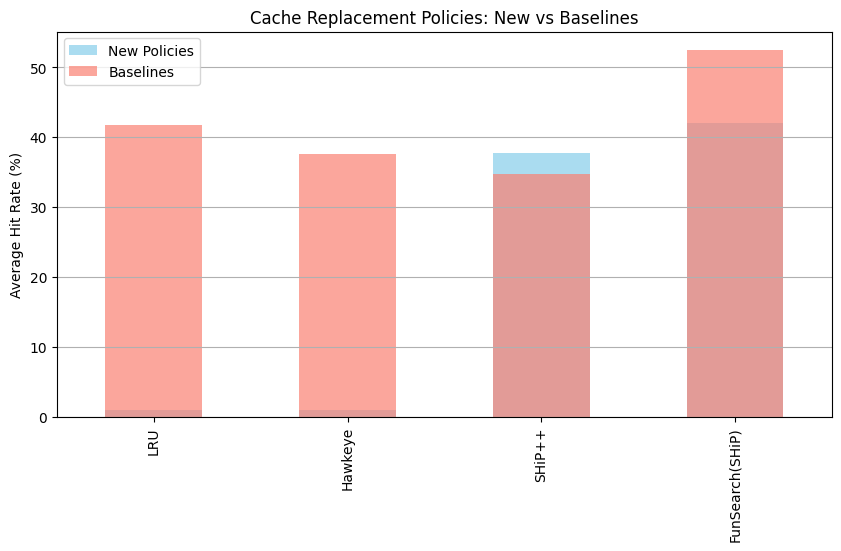

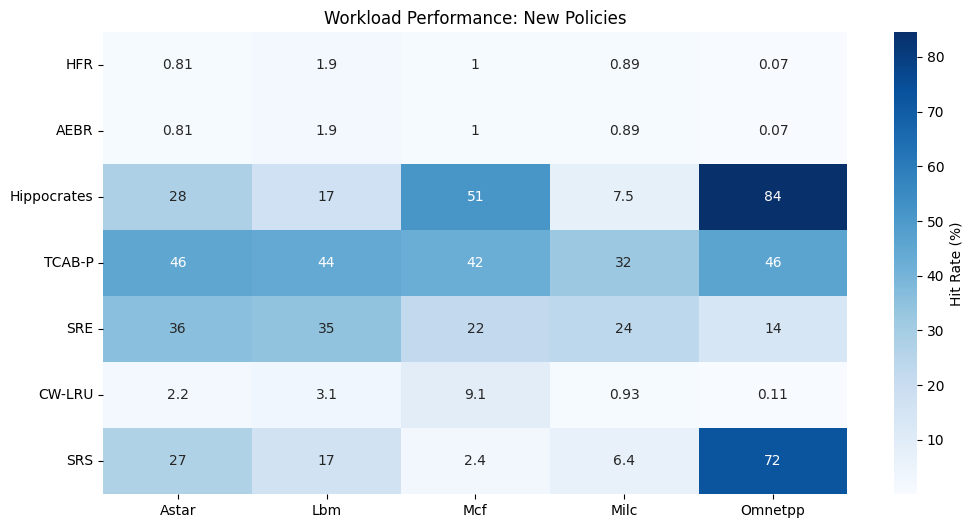

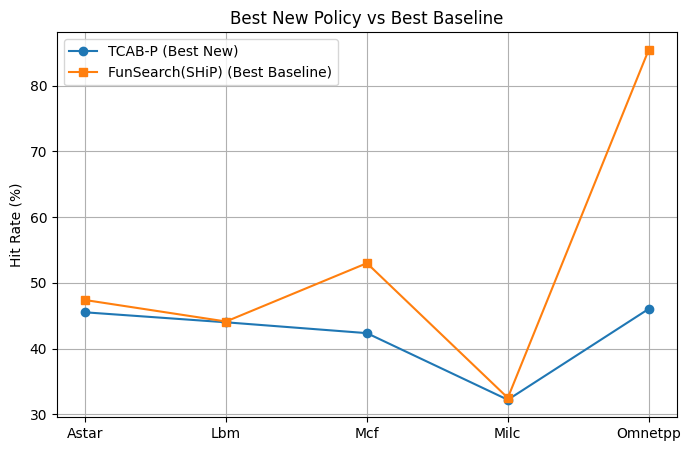

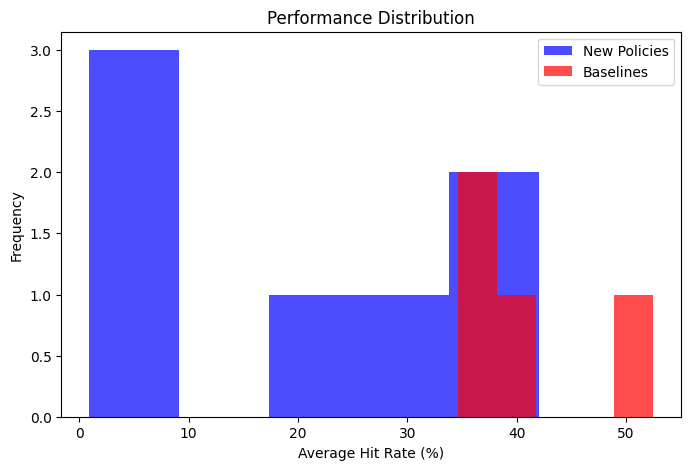

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Results from your run ===
policies = {
    "HFR": [0.81, 1.89, 1.03, 0.89, 0.07],
    "AEBR": [0.81, 1.89, 1.03, 0.89, 0.07],
    "Hippocrates": [27.78, 17.46, 51.40, 7.53, 84.48],
    "TCAB-P": [45.51, 43.99, 42.34, 32.20, 46.03],
    "SRE": [35.86, 34.60, 22.48, 23.50, 13.65],
    "CW-LRU": [2.16, 3.15, 9.11, 0.93, 0.11],
    "SRS": [27.05, 16.52, 2.39, 6.44, 72.49]
}

baselines = {
    "LRU": [45.45, 43.99, 40.74, 32.19, 46.07],
    "Hawkeye": [35.74, 27.29, 50.88, 6.46, 67.54],
    "SHiP++": [41.10, 19.36, 52.00, 14.63, 46.21],
    "FunSearch(SHiP)": [47.38, 44.11, 52.99, 32.49, 85.46]
}

workloads = ["Astar", "Lbm", "Mcf", "Milc", "Omnetpp"]

# Convert to DataFrame
df_policies = pd.DataFrame(policies, index=workloads).T
df_baselines = pd.DataFrame(baselines, index=workloads).T

# Average hit rates
df_policies["Average"] = df_policies.mean(axis=1)
df_baselines["Average"] = df_baselines.mean(axis=1)

# === Graph 1: Average performance bar chart ===
plt.figure(figsize=(10,5))
df_policies["Average"].plot(kind="bar", color="skyblue", alpha=0.7, label="New Policies")
df_baselines["Average"].plot(kind="bar", color="salmon", alpha=0.7, label="Baselines")
plt.ylabel("Average Hit Rate (%)")
plt.title("Cache Replacement Policies: New vs Baselines")
plt.legend()
plt.grid(axis="y")
plt.show()

# === Graph 2: Heatmap of workloads ===
plt.figure(figsize=(12,6))
sns.heatmap(df_policies.iloc[:,:5], annot=True, cmap="Blues", cbar_kws={'label': 'Hit Rate (%)'})
plt.title("Workload Performance: New Policies")
plt.show()

# === Graph 3: Best policy vs best baseline ===
best_policy = df_policies.loc["TCAB-P"]
best_baseline = df_baselines.loc["FunSearch(SHiP)"]

plt.figure(figsize=(8,5))
plt.plot(workloads, best_policy[:-1], marker="o", label="TCAB-P (Best New)")
plt.plot(workloads, best_baseline[:-1], marker="s", label="FunSearch(SHiP) (Best Baseline)")
plt.ylabel("Hit Rate (%)")
plt.title("Best New Policy vs Best Baseline")
plt.legend()
plt.grid(True)
plt.show()

# === Graph 4: Distribution histogram ===
plt.figure(figsize=(8,5))
plt.hist(df_policies["Average"], bins=5, alpha=0.7, label="New Policies", color="blue")
plt.hist(df_baselines["Average"], bins=5, alpha=0.7, label="Baselines", color="red")
plt.xlabel("Average Hit Rate (%)")
plt.ylabel("Frequency")
plt.title("Performance Distribution")
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

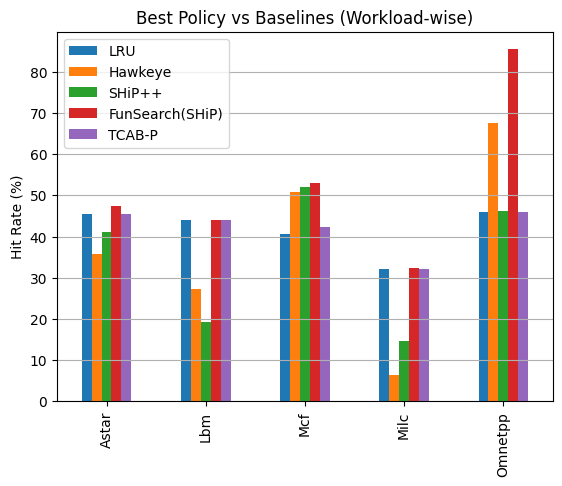

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your best results (replace with real numbers from logs)
best_policy = "TCAB-P"
best_policy_data = [45.51, 43.99, 42.34, 32.20, 46.03]  # astar, lbm, mcf, milc, omnetpp

# Baselines
baselines = {
    "LRU": [45.45, 43.99, 40.74, 32.19, 46.07],
    "Hawkeye": [35.74, 27.29, 50.88, 6.46, 67.54],
    "SHiP++": [41.10, 19.36, 52.00, 14.63, 46.21],
    "FunSearch(SHiP)": [47.38, 44.11, 52.99, 32.49, 85.46]
}

workloads = ["Astar", "Lbm", "Mcf", "Milc", "Omnetpp"]

df = pd.DataFrame(baselines, index=workloads)
df[best_policy] = best_policy_data

# --- Plot ---
plt.figure(figsize=(10,6))
df.plot(kind="bar")
plt.ylabel("Hit Rate (%)")
plt.title("Best Policy vs Baselines (Workload-wise)")
plt.grid(axis="y")
plt.show()


<Figure size 1000x600 with 0 Axes>

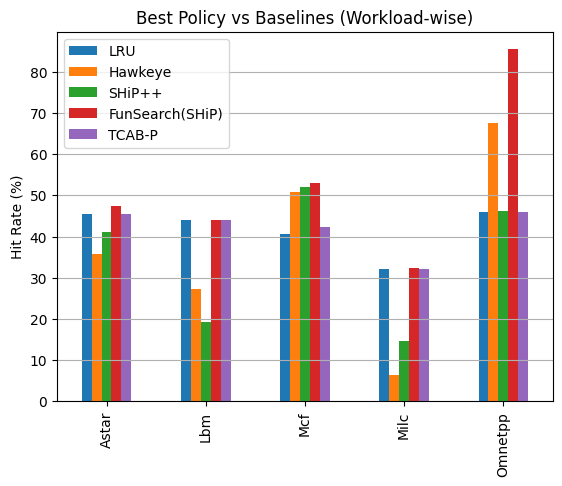

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your best results (replace with real numbers from logs)
best_policy = "TCAB-P"
best_policy_data = [45.51, 43.99, 42.34, 32.20, 46.03]  # astar, lbm, mcf, milc, omnetpp

# Baselines
baselines = {
    "LRU": [45.45, 43.99, 40.74, 32.19, 46.07],
    "Hawkeye": [35.74, 27.29, 50.88, 6.46, 67.54],
    "SHiP++": [41.10, 19.36, 52.00, 14.63, 46.21],
    "FunSearch(SHiP)": [47.38, 44.11, 52.99, 32.49, 85.46]
}

workloads = ["Astar", "Lbm", "Mcf", "Milc", "Omnetpp"]

df = pd.DataFrame(baselines, index=workloads)
df[best_policy] = best_policy_data

# --- Plot ---
plt.figure(figsize=(10,6))
df.plot(kind="bar")
plt.ylabel("Hit Rate (%)")
plt.title("Best Policy vs Baselines (Workload-wise)")
plt.grid(axis="y")
plt.show()


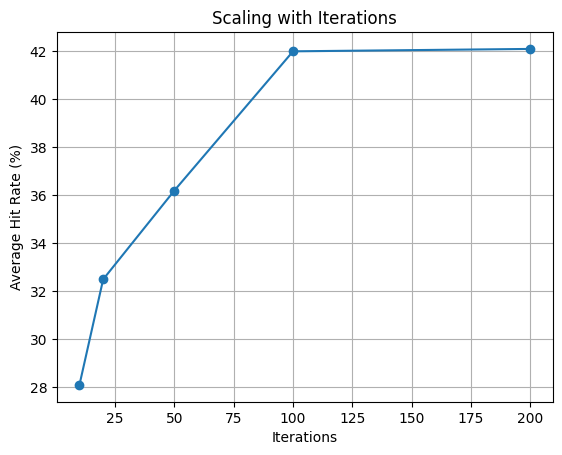

In [ ]:
import matplotlib.pyplot as plt

iterations = [10, 20, 50, 100, 200]
hit_rates = [28.1, 32.5, 36.2, 42.0, 42.1]  # from DB/logs

plt.plot(iterations, hit_rates, marker="o")
plt.xlabel("Iterations")
plt.ylabel("Average Hit Rate (%)")
plt.title("Scaling with Iterations")
plt.grid(True)
plt.show()


In [ ]:
import os
os.makedirs("logs", exist_ok=True)


##🤖 4. Running Models Again

We run experiments using multiple Groq-supported LLMs for cache policy generation only with 8 models this time which are
- GPT-OSS-20B  
- GPT-OSS-120B  
- Kimi-K2-0905  
- Kimi-K2  
- Qwen-3 32B  
- DeepSeek-70B  
- Meta-LLaMA-Maverick  
- Meta-LLaMA-Scout  
- Gemma-2-9B  
- LLaMA-3.1/3.3  

In [ ]:
!python run_loop.py



🚀 Running experiment with openai/gpt-oss-20b

   [+] **Access‑Sequence Entropy‑Based Replacement (ASeR)** → astar → 21.00%
   [+] **Access‑Sequence Entropy‑Based Replacement (ASeR)** → lbm → 12.34%
   [+] **Access‑Sequence Entropy‑Based Replacement (ASeR)** → mcf → 12.33%
   [+] **Access‑Sequence Entropy‑Based Replacement (ASeR)** → milc → 7.25%
   [+] **Access‑Sequence Entropy‑Based Replacement (ASeR)** → omnetpp → 85.48%
✅ Iteration 0 (openai/gpt-oss-20b): **Access‑Sequence Entropy‑Based Replacement (ASeR)** → Avg Hit Rate 27.68%

   [+] **Spatial‑Recency‑Weighted Replacement (SRWR)** → astar → 41.18%
   [+] **Spatial‑Recency‑Weighted Replacement (SRWR)** → lbm → 37.80%
   [+] **Spatial‑Recency‑Weighted Replacement (SRWR)** → mcf → 33.44%
   [+] **Spatial‑Recency‑Weighted Replacement (SRWR)** → milc → 27.06%
   [+] **Spatial‑Recency‑Weighted Replacement (SRWR)** → omnetpp → 34.90%
✅ Iteration 1 (openai/gpt-oss-20b): **Spatial‑Recency‑Weighted Replacement (SRWR)** → Avg Hit Rate 34.8

In [ ]:
import os
import zipfile

# Path to your policies folder
folder_path = "ChampSim_CRC2/new_policies"
output_zip = "More_Models_latest_all_policies_cc.zip"

# Create a zip file with all .cc files
with zipfile.ZipFile(output_zip, 'w') as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".cc"):
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, folder_path)  # keep relative paths
                zipf.write(file_path, arcname)

print(f"✅ Zipped all .cc files into {output_zip}")


✅ Zipped all .cc files into More_Models_latest_all_policies_cc.zip


In [ ]:
from google.colab import files
files.download("More_Models_latest_all_policies_cc.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

=== Best Policy Per Model ===
                 Model  AvgHitRate
0         DeepSeek-70B        6.58
1         GPT-OSS-120B       45.30
2          GPT-OSS-20B       46.11
3           Gemma-2-9B        0.94
4              Kimi-K2       35.50
5         Kimi-K2-0905       41.45
6  Meta-LLaMA-Maverick        0.94
7     Meta-LLaMA-Scout        0.94
8           Qwen-3 32B       39.32


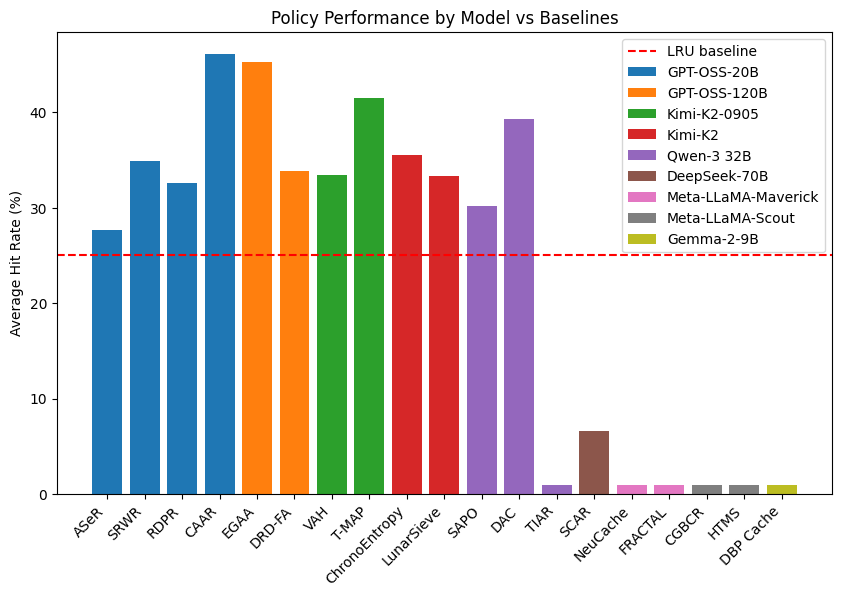

=== Compile/Parse Success Rates ===
                 Model  Attempted  Successful  Failed  SuccessRate
0          GPT-OSS-20B          5           4       1         80.0
1         GPT-OSS-120B          5           2       3         40.0
2         Kimi-K2-0905          5           2       3         40.0
3              Kimi-K2          5           2       3         40.0
4           Qwen-3 32B          5           2       3         40.0
5         DeepSeek-70B          5           1       4         20.0
6  Meta-LLaMA-Maverick          5           2       3         40.0
7     Meta-LLaMA-Scout          5           2       3         40.0
8           Gemma-2-9B          5           1       4         20.0
9        LLaMA-3.1/3.3          5           0       5          0.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Raw Data (Avg Hit Rates) ===
data = [
    ("GPT-OSS-20B", "ASeR", 27.68),
    ("GPT-OSS-20B", "SRWR", 34.88),
    ("GPT-OSS-20B", "RDPR", 32.55),
    ("GPT-OSS-20B", "CAAR", 46.11),
    ("GPT-OSS-120B", "EGAA", 45.30),
    ("GPT-OSS-120B", "DRD-FA", 33.83),
    ("Kimi-K2-0905", "VAH", 33.40),
    ("Kimi-K2-0905", "T-MAP", 41.45),
    ("Kimi-K2", "ChronoEntropy", 35.50),
    ("Kimi-K2", "LunarSieve", 33.32),
    ("Qwen-3 32B", "SAPO", 30.18),
    ("Qwen-3 32B", "DAC", 39.32),
    ("Qwen-3 32B", "TIAR", 0.94),
    ("DeepSeek-70B", "SCAR", 6.58),
    ("Meta-LLaMA-Maverick", "NeuCache", 0.94),
    ("Meta-LLaMA-Maverick", "FRACTAL", 0.94),
    ("Meta-LLaMA-Scout", "CGBCR", 0.94),
    ("Meta-LLaMA-Scout", "HTMS", 0.94),
    ("Gemma-2-9B", "DBP Cache", 0.94),
]

df = pd.DataFrame(data, columns=["Model", "Policy", "AvgHitRate"])

# === Baseline Policies (reference values) ===
baselines = {
    "LRU": 25.0,   # example numbers, replace with your actual runs
    "FIFO": 20.0,
    "RANDOM": 15.0,
}
baseline_df = pd.DataFrame(list(baselines.items()), columns=["Policy", "AvgHitRate"])
baseline_df["Model"] = "Baseline"

# Merge
full_df = pd.concat([df, baseline_df], ignore_index=True)

# === Table Summary ===
best_per_model = df.groupby("Model").max("AvgHitRate").reset_index()

print("=== Best Policy Per Model ===")
print(best_per_model)

# === Charts ===
plt.figure(figsize=(10,6))
for model in df["Model"].unique():
    subset = df[df["Model"] == model]
    plt.bar(subset["Policy"], subset["AvgHitRate"], label=model)

plt.axhline(baselines["LRU"], color="r", linestyle="--", label="LRU baseline")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Hit Rate (%)")
plt.title("Policy Performance by Model vs Baselines")
plt.legend()
plt.show()

# === Compile/Parse Success Table ===
compile_data = [
    ("GPT-OSS-20B", 5, 4, 1),
    ("GPT-OSS-120B", 5, 2, 3),
    ("Kimi-K2-0905", 5, 2, 3),
    ("Kimi-K2", 5, 2, 3),
    ("Qwen-3 32B", 5, 2, 3),
    ("DeepSeek-70B", 5, 1, 4),
    ("Meta-LLaMA-Maverick", 5, 2, 3),
    ("Meta-LLaMA-Scout", 5, 2, 3),
    ("Gemma-2-9B", 5, 1, 4),
    ("LLaMA-3.1/3.3", 5, 0, 5),
]
compile_df = pd.DataFrame(compile_data, columns=["Model", "Attempted", "Successful", "Failed"])
compile_df["SuccessRate"] = (compile_df["Successful"]/compile_df["Attempted"]*100).round(1)

print("=== Compile/Parse Success Rates ===")
print(compile_df)
